<a href="https://colab.research.google.com/github/ElisaCSouza23/projetos/blob/main/Desafio_modulo_01_Bootcamp_Analista_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enunciado da questão**


Você é um cientista de dados em uma equipe de saúde que está buscando
identificar padrões em dados médicos de pacientes. 

Sua equipe está trabalhando em um projeto para identificar riscos de saúde em pacientes com problemas de saúde específicos, como diabetes, hipertensão ou doença cardiovascular. 

**Seu objetivo é coletar, tratar e analisar dados de pacientes
para criar grupos de pacientes com risco intermediário, alto ou muito alto de
problemas de saúde.**

Sua equipe decidiu usar o método de **agrupamento k-means para agrupar os
pacientes em três grupos distintos com base nas informações fornecidas**. O
objetivo é identificar padrões nos dados que possam indicar o risco de um paciente desenvolver problemas cardiovasculares. 

As doenças cardiovasculares são uma das principais causas de morbidade e mortalidade em todo o mundo. É essencial que os profissionais de saúde possam
identificar pacientes com maior risco de desenvolver essas doenças, a fim de
oferecer tratamentos e aconselhamentos preventivos personalizados.


# Importando bibliotecas



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

# Verificando versões das bibliotecas

In [ ]:
# import sklearn
# import plotly
# print(f'''Verificando versões das bibliotecas: \n
# pandas: {pd._version_}
# sklearn: {sklearn._version_}
# plotly: {plotly._version_}
# ''') 

# Coleta de dados

In [ ]:
# Coleta de dados 1
dados_medicos = pd.read_csv('/content/dados_medicos.csv', sep=';', encoding='latin-1')
dados_medicos.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [ ]:
# Coleta de dados 2
dados_perfil = pd.read_excel('/content/dados_perfil.xlsx')
dados_perfil.head()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41


In [ ]:
# Coleta de dados 3
uf = pd.read_csv('/content/unidades_federativas_do_Brasil.csv', sep=';', encoding='latin-1')
uf.head()

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


# Analisando os dados

In [ ]:
# info da base de dados médicos
dados_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               989 non-null    float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [ ]:
# info da base de dados perfil
dados_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Gênero             1000 non-null   object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  1000 non-null   object 
 4   Atividade Física   1000 non-null   object 
 5   cod_uf             1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
# info da base de dados Unidades Federativas do Brasil
uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


# Analisando dados ausentes

In [ ]:
# Analisando dados médicos
dados_medicos.isna().sum()

ID                                0
IMC                               0
Pressão Sistólica                 0
Pressão Diastólica                0
Nível de Açúcar                   0
peso                              0
Colesterol Total                 11
Triglicerídeos                    0
Histórico Familiar - Cardiaco     0
dtype: int64

Há dados nulos na coluna "Colesterol total".





In [ ]:
# Analisando dados perfil
dados_perfil.isna().sum()

ID                    0
Gênero                0
Idade                10
Consumo de Álcool     0
Atividade Física      0
cod_uf                0
dtype: int64

Há dados nulos na coluna "Idade".


In [ ]:
# Analisando dados Unidades Federativas do Brasil
uf.isna().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64

Não há dados nulos.

# Visualizando dados ausentes

In [ ]:
# Verificando os registros com valores nulos (dados médicos)
dados_medicos.loc[dados_medicos['Colesterol Total'].isnull()]

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
42,43,26.7,165,66,Normal,177.2,NaN,141.9,Não
48,49,24.4,141,68,Normal,113.8,NaN,175.8,Sim
218,219,33.5,142,69,Normal,150.9,NaN,168.3,Não
401,402,31.0,142,90,Alto,104.4,NaN,120.0,Não
565,566,20.6,155,87,Normal,129.9,NaN,155.6,Sim
629,630,28.7,92,86,Normal,143.6,NaN,110.7,Não
710,711,33.6,92,100,Alto,171.9,NaN,119.1,Não
720,721,27.4,112,88,Normal,143.0,NaN,148.1,Não
737,738,33.2,140,61,Normal,133.8,NaN,86.0,Não
839,840,36.1,116,83,Normal,134.2,NaN,160.4,Não


In [ ]:
# Verificando os registros com valores nulos (dados perfil)
dados_perfil.loc[dados_perfil['Idade'].isnull()]

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
92,93,F,NaN,Baixo,Atividade Moderada,33
162,163,M,NaN,Baixo,Sedentário,41
163,164,F,NaN,Baixo,Ativo,28
164,165,F,NaN,Baixo,Atividade Moderada,41
205,206,M,NaN,Baixo,Ativo,12
833,834,M,NaN,Moderado,Ativo,53
841,842,F,NaN,Alto,Atividade Moderada,43
894,895,F,NaN,Moderado,Atividade Moderada,43
971,972,M,NaN,Alto,Atividade Moderada,53
995,996,F,NaN,Moderado,Sedentário,23


# Tratamento de dados **numéricos** coletados

## Eliminação de dados

In [ ]:
# Eliminando dados ausentes de dados perfil (Idade, não faz sentido algum fazer a média entre as idades, por isso, 
# iremos excluir os registros nulos)
dados_perfil.dropna(subset=['Idade'], inplace=True)
dados_perfil

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41
...,...,...,...,...,...,...
994,995,F,18.0,Alto,Sedentário,31
996,997,M,24.0,Baixo,Ativo,23
997,998,M,78.0,Baixo,Atividade Moderada,41
998,999,M,57.0,Baixo,Atividade Moderada,51


In [ ]:
dados_perfil.isna().sum()

ID                   0
Gênero               0
Idade                0
Consumo de Álcool    0
Atividade Física     0
cod_uf               0
dtype: int64

De fato, removemos os valores nulos do dataframe.

In [ ]:
dados_perfil.count()

ID                   990
Gênero               990
Idade                990
Consumo de Álcool    990
Atividade Física     990
cod_uf               990
dtype: int64

## Corrigindo dados ausentes por outras medidas (média/mediana)

In [ ]:
# Visualizando estatísticas do dataset de dados médicos
dados_medicos.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219717,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,32.007185,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.000000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,194.300000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.300000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [ ]:
# Realizando a média e a mediana da variável 'Colesterol Total'
media = dados_medicos['Colesterol Total'].mean()
mediana = dados_medicos['Colesterol Total'].median()

In [ ]:
# Verificando os valores
print(f'O valor da média é: {media}, e o valor da mediana é: {mediana}')

O valor da média é: 193.21971688574317, e o valor da mediana é: 194.3


In [ ]:
# Fazendo o arredondamento da variável média
round(media,2)

193.22

In [ ]:
# Preenchendo os valores ausentes pela média
dados_medicos['Colesterol Total'].fillna(round(media,2), inplace=True)

In [ ]:
# Verificando se existe algum valor ausente
dados_medicos.isna().sum()

ID                               0
IMC                              0
Pressão Sistólica                0
Pressão Diastólica               0
Nível de Açúcar                  0
peso                             0
Colesterol Total                 0
Triglicerídeos                   0
Histórico Familiar - Cardiaco    0
dtype: int64

Não há registros nulos.

# Analisando dados atualizados

In [ ]:
# Info da base de dados médicos
dados_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               1000 non-null   float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [ ]:
# Describe da base de dados médicos
dados_medicos.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219720,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,31.830481,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.300000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,193.550000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.200000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [ ]:
# Info da base de dados de perfil
dados_perfil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 990 non-null    int64  
 1   Gênero             990 non-null    object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  990 non-null    object 
 4   Atividade Física   990 non-null    object 
 5   cod_uf             990 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 54.1+ KB


In [ ]:
# Describe da base de dados de perfil
dados_perfil.describe()

,ID,Idade,cod_uf
count,990.000000,990.000000,990.000000
mean,500.171717,48.887879,29.211111
std,287.750156,17.940937,13.025171
min,1.000000,18.000000,11.000000
25%,253.250000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,747.750000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


In [ ]:
# Info da uf
uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [ ]:
# Descibre da uf
uf.describe()

,codigo_uf,latitude,longitude
count,27.000000,27.000000,27.000000
mean,29.111111,-12.381111,-48.410370
std,13.024631,8.476122,9.291479
min,11.000000,-30.170000,-70.550000
25%,19.000000,-18.645000,-52.990000
50%,27.000000,-10.570000,-48.260000
75%,38.000000,-6.205000,-41.025000
max,53.000000,1.990000,-36.590000


# Manipulação e visualização de dados

<Axes: title={'center': 'Colesterol'}, xlabel='Colesterol Total', ylabel='Count'>

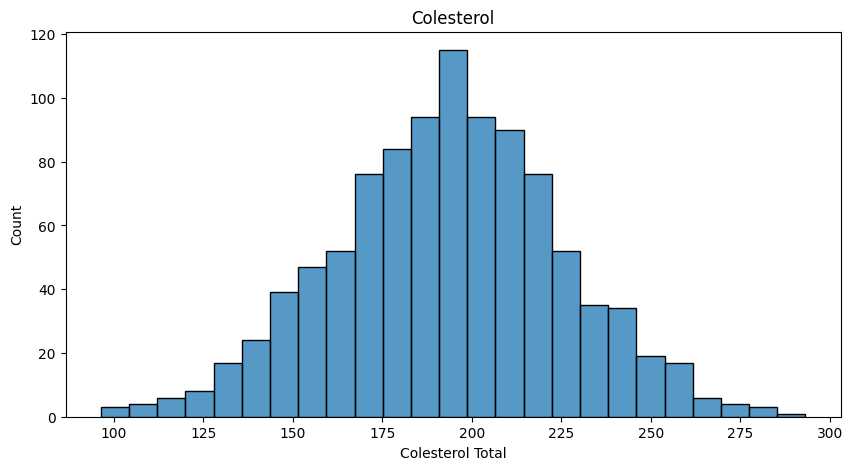

In [ ]:
# Criando histograma baseado no colesterol dos dados médicos
plt.figure(figsize=(10,5))
plt.title('Colesterol')
sns.histplot(dados_medicos['Colesterol Total'], bins=25)

<Axes: title={'center': 'Idade'}, xlabel='Idade', ylabel='Count'>

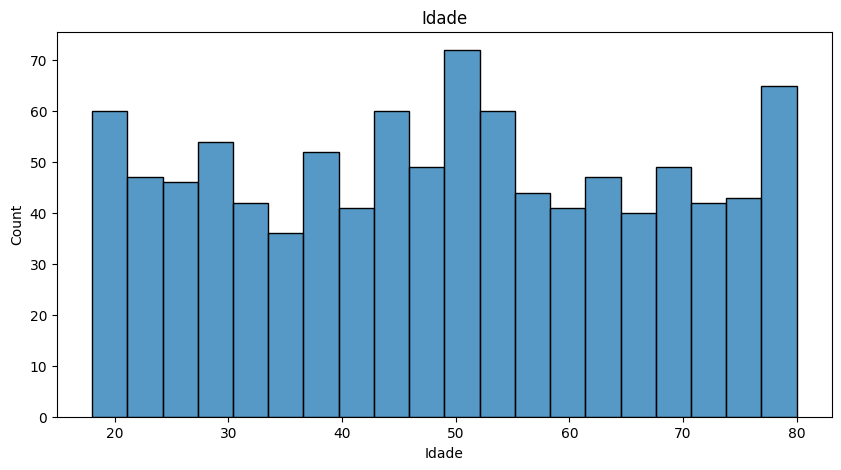

In [ ]:
# Criando histograma baseado na Idade dos dados de perfil
plt.figure(figsize=(10,5))
plt.title('Idade')
sns.histplot(dados_perfil['Idade'], bins=20)

# Criando gráfico boxplot

<Axes: title={'center': 'Colesterol dos pacientes'}, xlabel='Colesterol Total'>

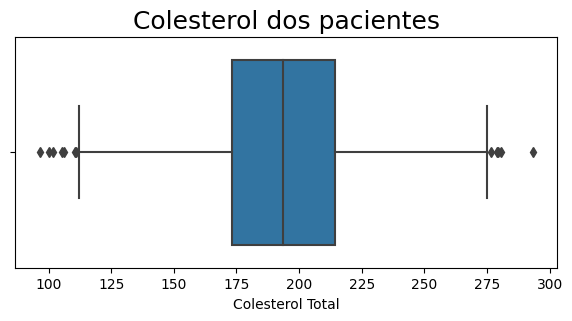

In [ ]:
# Criando boxplot para o Colesterol 
plt.figure(figsize=(7,3))
plt.title('Colesterol dos pacientes', size=18)
sns.boxplot(x='Colesterol Total', data=dados_medicos , orient='h')

<Axes: title={'center': 'Idade dos pacientes'}, xlabel='Idade'>

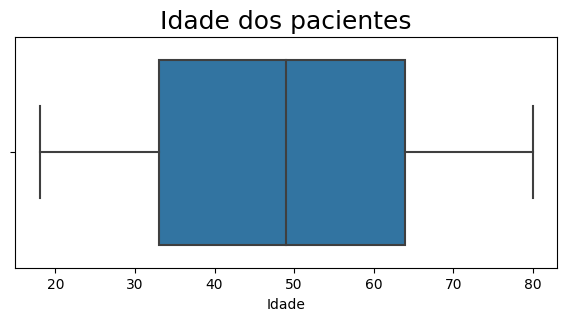

In [ ]:
# Criando boxplot para a Idade 
plt.figure(figsize=(7,3))
plt.title('Idade dos pacientes', size=18)
sns.boxplot(x='Idade', data=dados_perfil , orient='h')

# Enriquecendo os dados coletados

Nessa etapa, vamos enriquecer nossa base de dados  erealizar a junção entre os datasets.

# Criando um novo dataframe (Pacientes)  
Nessa etapa vamos realizar um **merge** entre os dados obtidos entre a relação
das tabelas dados_perfil, dados_medicos e
unidades_federativas_do_Brasil.

In [ ]:
# Verificando dados médicos
dados_medicos.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [ ]:
# Verificando dados do perfil dos pacientes
dados_perfil.head()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41


In [ ]:
# Verificando dados das UF
uf.head()

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


# Realizando junção entre datasets **dados_médicos** e **dados_perfil**

In [ ]:
pacientes = pd.merge(dados_medicos, dados_perfil, on='ID')
pacientes

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim,M,74.0,Moderado,Atividade Moderada,31
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim,F,34.0,Baixo,Atividade Moderada,35
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não,M,18.0,Moderado,Atividade Moderada,29
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não,M,72.0,Baixo,Sedentário,15
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não,F,63.0,Baixo,Atividade Moderada,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,995,32.7,148,87,Normal,154.2,203.7,152.9,Não,F,18.0,Alto,Sedentário,31
986,997,21.8,137,73,Normal,171.4,194.3,125.2,Sim,M,24.0,Baixo,Ativo,23
987,998,37.1,94,70,Alto,157.6,188.2,120.7,Sim,M,78.0,Baixo,Atividade Moderada,41
988,999,30.4,141,77,Alto,112.2,147.5,54.6,Sim,M,57.0,Baixo,Atividade Moderada,51


Observe que a coluna que se refere ao código da unidade federativa no dataset **pacientes** é: 'cod_uf' e no dataset **uf** é 'codigo_uf'

# Realizando junção entre dataset **pacientes** e **uf**

In [ ]:
# Para poder concatenar os datsets, teremos que editar a coluna 'codigo_uf' do dataset uf
uf = uf.rename(columns={'codigo_uf': 'cod_uf'})
uf.head()

,cod_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


In [ ]:
pacientes_uf = pd.merge(pacientes, uf, on='cod_uf').sort_values('cod_uf')
pacientes_uf

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais
891,245,25.1,95,91,Normal,122.7,187.3,144.9,Sim,F,73.0,Moderado,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
918,939,26.0,104,64,Alto,156.5,165.7,142.9,Não,M,70.0,Baixo,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
917,934,21.3,146,67,Normal,139.3,166.3,141.6,Sim,F,55.0,Baixo,Sedentário,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
916,908,23.9,163,96,Normal,144.4,197.3,170.1,Sim,F,25.0,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
915,866,33.1,162,87,Normal,140.2,178.9,138.2,Não,F,61.0,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,452,34.8,94,77,Normal,159.4,201.3,133.7,Sim,F,45.0,Baixo,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
250,445,37.8,139,79,Normal,118.2,133.8,49.2,Não,F,32.0,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
249,434,39.0,165,97,Normal,162.8,240.0,180.5,Sim,M,19.0,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
257,570,38.2,110,76,Normal,174.2,231.6,155.9,Não,M,55.0,Alto,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil


In [ ]:
# Resetando o index do dataset criado
pacientes_uf.reset_index(drop=True)

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais
0,245,25.1,95,91,Normal,122.7,187.3,144.9,Sim,F,73.0,Moderado,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,939,26.0,104,64,Alto,156.5,165.7,142.9,Não,M,70.0,Baixo,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
2,934,21.3,146,67,Normal,139.3,166.3,141.6,Sim,F,55.0,Baixo,Sedentário,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
3,908,23.9,163,96,Normal,144.4,197.3,170.1,Sim,F,25.0,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
4,866,33.1,162,87,Normal,140.2,178.9,138.2,Não,F,61.0,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,452,34.8,94,77,Normal,159.4,201.3,133.7,Sim,F,45.0,Baixo,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
986,445,37.8,139,79,Normal,118.2,133.8,49.2,Não,F,32.0,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
987,434,39.0,165,97,Normal,162.8,240.0,180.5,Sim,M,19.0,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
988,570,38.2,110,76,Normal,174.2,231.6,155.9,Não,M,55.0,Alto,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil


# Alterando disposição das colunas do arquivo de dados

In [ ]:
# Selecionar a ordem das colunas a serem visualizadas
ordem_colunas = ['ID', 'Gênero', 'Idade', 'peso', 'Colesterol Total', 'Triglicerídeos', 'IMC', 
                 'Nível de Açúcar','Pressão Sistólica', 'Pressão Diastólica', 
                 'Histórico Familiar - Cardiaco',
                 'Consumo de Álcool', 'Atividade Física', 'cod_uf',
                'uf',	'nome',	'latitude',	'longitude',	'regiao',	'pais' ]
                
pacientes_uf[ordem_colunas]               

,ID,Gênero,Idade,peso,Colesterol Total,Triglicerídeos,IMC,Nível de Açúcar,Pressão Sistólica,Pressão Diastólica,Histórico Familiar - Cardiaco,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais
891,245,F,73.0,122.7,187.3,144.9,25.1,Normal,95,91,Sim,Moderado,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
918,939,M,70.0,156.5,165.7,142.9,26.0,Alto,104,64,Não,Baixo,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
917,934,F,55.0,139.3,166.3,141.6,21.3,Normal,146,67,Sim,Baixo,Sedentário,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
916,908,F,25.0,144.4,197.3,170.1,23.9,Normal,163,96,Sim,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
915,866,F,61.0,140.2,178.9,138.2,33.1,Normal,162,87,Não,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,452,F,45.0,159.4,201.3,133.7,34.8,Normal,94,77,Sim,Baixo,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
250,445,F,32.0,118.2,133.8,49.2,37.8,Normal,139,79,Não,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
249,434,M,19.0,162.8,240.0,180.5,39.0,Normal,165,97,Sim,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
257,570,M,55.0,174.2,231.6,155.9,38.2,Normal,110,76,Não,Alto,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil


In [ ]:
# Atribuindo alterações ao Dataframe
pacientes_uf = pacientes_uf[ordem_colunas].reset_index(drop=True)
pacientes_uf

,ID,Gênero,Idade,peso,Colesterol Total,Triglicerídeos,IMC,Nível de Açúcar,Pressão Sistólica,Pressão Diastólica,Histórico Familiar - Cardiaco,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais
0,245,F,73.0,122.7,187.3,144.9,25.1,Normal,95,91,Sim,Moderado,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,939,M,70.0,156.5,165.7,142.9,26.0,Alto,104,64,Não,Baixo,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
2,934,F,55.0,139.3,166.3,141.6,21.3,Normal,146,67,Sim,Baixo,Sedentário,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
3,908,F,25.0,144.4,197.3,170.1,23.9,Normal,163,96,Sim,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
4,866,F,61.0,140.2,178.9,138.2,33.1,Normal,162,87,Não,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,452,F,45.0,159.4,201.3,133.7,34.8,Normal,94,77,Sim,Baixo,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
986,445,F,32.0,118.2,133.8,49.2,37.8,Normal,139,79,Não,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
987,434,M,19.0,162.8,240.0,180.5,39.0,Normal,165,97,Sim,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
988,570,M,55.0,174.2,231.6,155.9,38.2,Normal,110,76,Não,Alto,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil


# Gerando correlação entre as variáveis

In [ ]:
correlacao = pacientes_uf.corr()
correlacao

<ipython-input-51-f565c9597a70>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,ID,Idade,peso,Colesterol Total,Triglicerídeos,IMC,Pressão Sistólica,Pressão Diastólica,cod_uf,latitude,longitude
ID,1.000000,-0.016753,-0.036580,-0.020193,-0.012826,-0.011964,-0.003694,-0.058561,-0.001991,-0.017101,-0.024398
Idade,-0.016753,1.000000,0.022034,0.041467,0.018501,-0.022759,0.000210,0.000155,0.004744,-0.013783,0.026463
peso,-0.036580,0.022034,1.000000,0.612699,0.341051,0.007907,0.014242,0.036182,0.006299,0.034552,0.053051
Colesterol Total,-0.020193,0.041467,0.612699,1.000000,0.567596,0.022001,0.032770,0.053514,0.012148,0.005731,0.073560
Triglicerídeos,-0.012826,0.018501,0.341051,0.567596,1.000000,-0.036660,0.038577,-0.000404,0.033137,-0.038338,0.075262
IMC,-0.011964,-0.022759,0.007907,0.022001,-0.036660,1.000000,-0.040235,-0.019576,-0.015139,0.007445,-0.000732
Pressão Sistólica,-0.003694,0.000210,0.014242,0.032770,0.038577,-0.040235,1.000000,-0.008359,-0.013038,0.049698,-0.002143
Pressão Diastólica,-0.058561,0.000155,0.036182,0.053514,-0.000404,-0.019576,-0.008359,1.000000,-0.032041,-0.006943,0.026121
cod_uf,-0.001991,0.004744,0.006299,0.012148,0.033137,-0.015139,-0.013038,-0.032041,1.000000,-0.710645,0.183073
latitude,-0.017101,-0.013783,0.034552,0.005731,-0.038338,0.007445,0.049698,-0.006943,-0.710645,1.000000,-0.054112


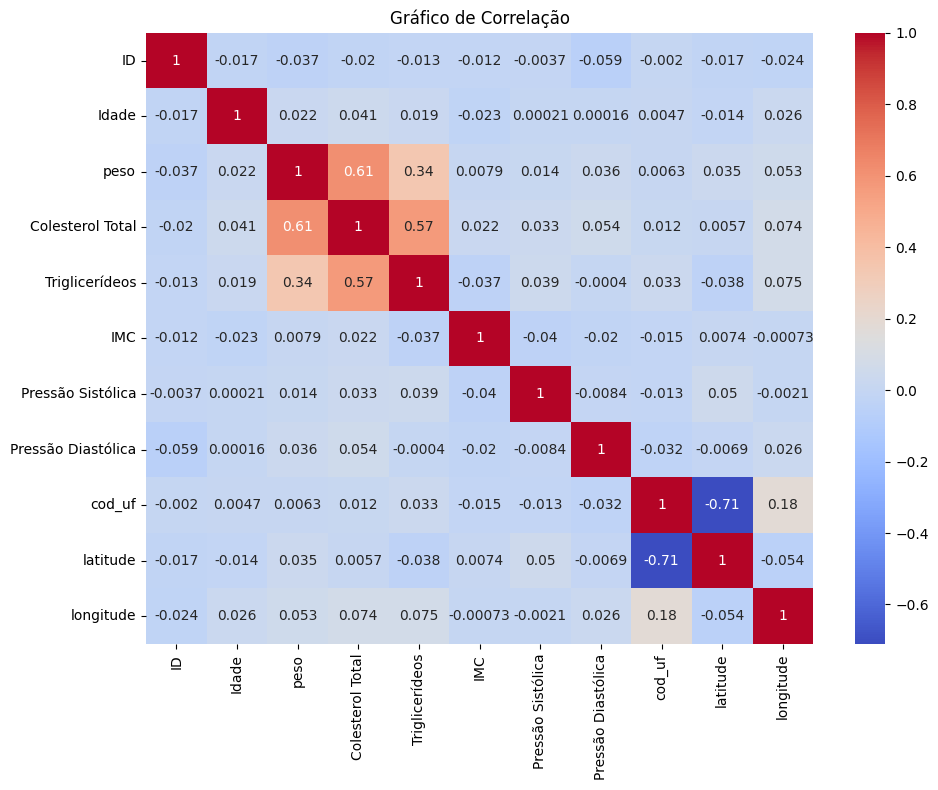

In [ ]:
# Gerando gráfico de correlação entre variáveis
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', ax=ax)
plt.title('Gráfico de Correlação')
plt.tight_layout()
plt.show()



# Aplicação do Modelo de Machine Learning


 

*   **WCSS** (Within-Cluster Sum of Squares) é uma métrica usada em algoritmos de clusterização, como o K-means, para avaliar a qualidade da divisão dos dados em clusters. Representa a soma dos quadrados das distâncias entre cada ponto de dado e o centroide de seu cluster correspondente. O objetivo é minimizar o WCSS, pois isso indica que os pontos estão mais próximos do centro de seus respectivos clusters, refletindo uma divisão mais precisa dos dados.

*  O **método do cotovelo** (Elbow method) é uma técnica utilizada na análise de clusters para determinar o número ideal de clusters em um conjunto de dados. Ele envolve plotar o valor do WCSS em função do número de clusters e identificar o ponto de inflexão na curva, que se assemelha a um cotovelo. O número de clusters correspondente a esse ponto é considerado o número ideal de clusters, pois indica um equilíbrio entre a compactação dos clusters (WCSS) e a simplicidade do modelo.




## Aplicando método do cotovelo




In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Criando função para calcular WCSS
def calcular_WCSS(dados_pacientes):
  WCSS = []
  for k in range(1,11):
      kmeans = KMeans(n_clusters=k, random_state=0)
      kmeans.fit(X=dados_pacientes)
      WCSS.append(kmeans.inertia_)
  return WCSS   

  # Em resumo, a função percorre um loop variando o número de clusters de 1 a 10, 
  # ajusta um modelo K-means aos dados dos pacientes e calcula o valor do WCSS para cada número de clusters. 
  # Em seguida, retorna uma lista contendo os valores do WCSS para cada configuração de clusters testada.

In [ ]:
# Criando dados de pacientes com as variáveis: peso e Triglicerídeos
dados_pacientes = pacientes_uf[['peso', 'Triglicerídeos']]
dados_pacientes

,peso,Triglicerídeos
0,122.7,144.9
1,156.5,142.9
2,139.3,141.6
3,144.4,170.1
4,140.2,138.2
...,...,...
985,159.4,133.7
986,118.2,49.2
987,162.8,180.5
988,174.2,155.9


In [ ]:
# Calculando WCSS com os dados de pacientes
WCSS_dados_pacientes = calcular_WCSS(dados_pacientes)
WCSS_dados_pacientes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[2015696.2225858583,
 1111177.2727539712,
 836860.9628075653,
 620739.276164484,
 515897.5732899989,
 435233.10326929356,
 385148.4376268259,
 347473.7203824027,
 305432.056058292,
 278410.7026284811]

In [ ]:
# Visualizando os dados obtidos do WCSS
for i in range(len(WCSS_dados_pacientes)):
    print(f'O cluster {i} possui valor de WCSS de {WCSS_dados_pacientes[i]}')

O cluster 0 possui valor de WCSS de 2015696.2225858583
O cluster 1 possui valor de WCSS de 1111177.2727539712
O cluster 2 possui valor de WCSS de 836860.9628075653
O cluster 3 possui valor de WCSS de 620739.276164484
O cluster 4 possui valor de WCSS de 515897.5732899989
O cluster 5 possui valor de WCSS de 435233.10326929356
O cluster 6 possui valor de WCSS de 385148.4376268259
O cluster 7 possui valor de WCSS de 347473.7203824027
O cluster 8 possui valor de WCSS de 305432.056058292
O cluster 9 possui valor de WCSS de 278410.7026284811


# Visualizando o método do cotovelo

In [ ]:
# Gráfico do cotovelo
grafico_wcss = px.line(x=range(1,11), y=WCSS_dados_pacientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title ='Calculando o WCSS',
                  title_x = 0.5,
                  xaxis_title = 'Número de clusters',
                  yaxis_title = 'Valor do WCSS',
                  template = 'plotly_white')
fig.show()

In [ ]:
# Crie o gráfico de WCSS e, após análise dos dados no gráfico, responda: Qual é o valor de WCSS para cluster de número 3?

Crie o gráfico de WCSS e, após análise dos dados no gráfico, responda: Qual é o valor de WCSS para cluster de número 3?

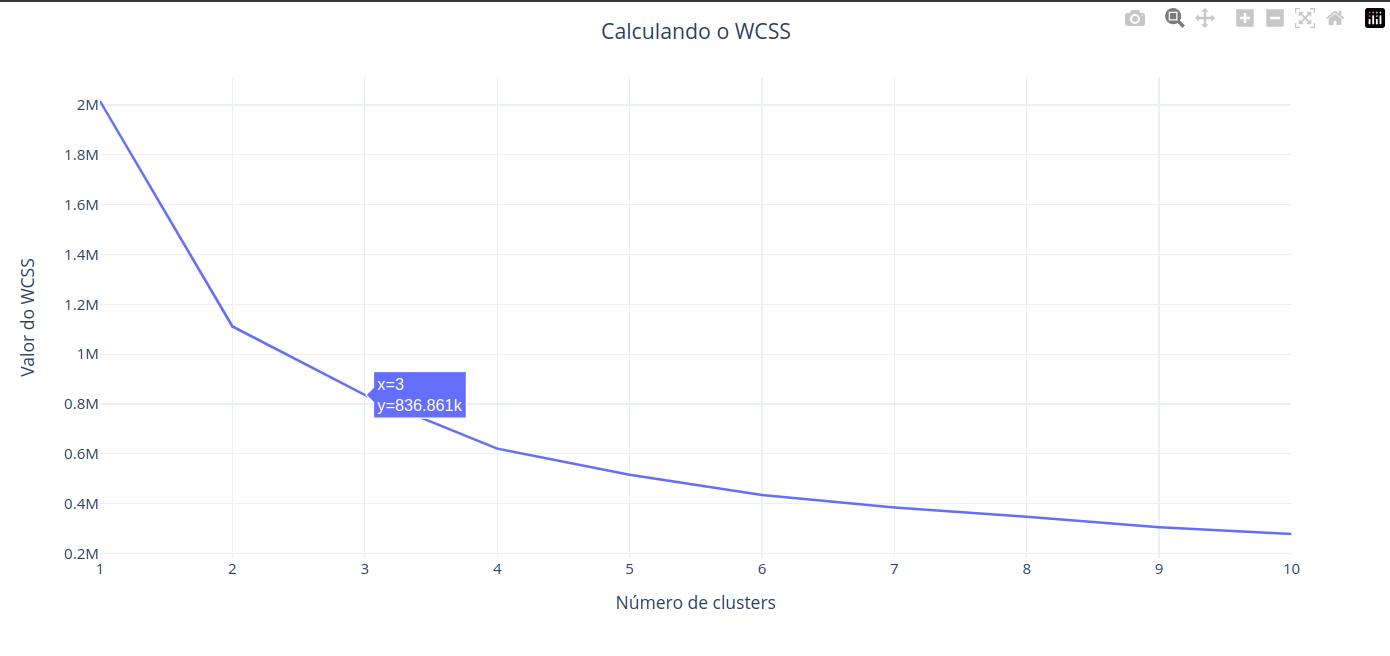

Como pode se observar na imagem acima, o valor do WCSS quando o número de cluster = 3 é 836.661K

# Criando agrupamentos para cada paciente

In [ ]:
# Aplicando algoritmo de K-Means
kmeans_pacientes = KMeans(n_clusters=3,random_state=0)
pacientes_uf['Cluster'] = kmeans_pacientes.fit_predict(dados_pacientes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Visualizando dados
pacientes_uf.head()

,ID,Gênero,Idade,peso,Colesterol Total,Triglicerídeos,IMC,Nível de Açúcar,Pressão Sistólica,Pressão Diastólica,...,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais,Cluster
0,245,F,73.0,122.7,187.3,144.9,25.1,Normal,95,91,...,Moderado,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1
1,939,M,70.0,156.5,165.7,142.9,26.0,Alto,104,64,...,Baixo,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1
2,934,F,55.0,139.3,166.3,141.6,21.3,Normal,146,67,...,Baixo,Sedentário,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1
3,908,F,25.0,144.4,197.3,170.1,23.9,Normal,163,96,...,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1
4,866,F,61.0,140.2,178.9,138.2,33.1,Normal,162,87,...,Baixo,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1


In [ ]:
pacientes_uf.tail()

,ID,Gênero,Idade,peso,Colesterol Total,Triglicerídeos,IMC,Nível de Açúcar,Pressão Sistólica,Pressão Diastólica,...,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais,Cluster
985,452,F,45.0,159.4,201.3,133.7,34.8,Normal,94,77,...,Baixo,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,1
986,445,F,32.0,118.2,133.8,49.2,37.8,Normal,139,79,...,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,0
987,434,M,19.0,162.8,240.0,180.5,39.0,Normal,165,97,...,Moderado,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,2
988,570,M,55.0,174.2,231.6,155.9,38.2,Normal,110,76,...,Alto,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,1
989,9,M,27.0,169.5,222.0,205.6,37.6,Normal,126,62,...,Moderado,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,2


# Calculando os centroides de cada cluster

In [ ]:
centroide_clusters = kmeans_pacientes.cluster_centers_
centroide_clusters

array([[132.57424242, 103.90719697],
       [151.64482072, 149.2436255 ],
       [170.221875  , 194.88839286]])

Aqui temos os centroides dos 3 clusters de acordo com os atributos. Nesse exemplo, vemos os centroides de 'peso' e 'Triglicerídeos

# Criando função para gerar gráficos

In [ ]:
def gera_grafico(x,y,x_label,y_label):
  grafico = px.scatter(x=x, y=y, color=pacientes_uf['Cluster'])
  fig = go.Figure(grafico)
  fig.update_layout(title='Análise de Clusters',
                    xaxis_title = x_label,
                    yaxis_title = y_label)
  fig.show()

In [ ]:
# Um exemplo de função
gera_grafico(pacientes_uf['peso'], pacientes_uf['Colesterol Total'], 'Peso', 'Colesterol')

# Segmentando os clientes baseado na análise dos clusters


*   Baixo risco: Baixos níves de triglicerídeos e baixo peso
*   Risco moderado: Triglicerídeos e peso medianos
*   Alto risco: Triglicerídeos e peso altos






In [ ]:
# Gerando gráfico de análise de clusters
x = 'peso'
y = 'Triglicerídeos'

gera_grafico(pacientes_uf[x], pacientes_uf[y],x,y)

In [ ]:
# Realiza uma cópia dos dados dos pacientes
cluster_pacientes = pacientes_uf

In [ ]:
# Segmentando os pacientes baseado na análise de clusters
cluster_risco_baixo = cluster_pacientes.loc[cluster_pacientes['Cluster'] == 0, 'nome_cluster'] 
cluster_risco_moderado = cluster_pacientes.loc[cluster_pacientes['Cluster'] == 1, 'nome_cluster']
cluster_risco_alto = cluster_pacientes.loc[cluster_pacientes['Cluster'] == 2, 'nome_cluster'] 

In [ ]:
# Visualizando 
cluster_risco_baixo

6      Baixo Risco
9      Baixo Risco
11     Baixo Risco
12     Baixo Risco
14     Baixo Risco
          ...     
968    Baixo Risco
974    Baixo Risco
982    Baixo Risco
984    Baixo Risco
986    Baixo Risco
Name: nome_cluster, Length: 265, dtype: object

In [ ]:
cluster_risco_moderado

0      Risco Moderado
1      Risco Moderado
2      Risco Moderado
3      Risco Moderado
4      Risco Moderado
            ...      
980    Risco Moderado
981    Risco Moderado
983    Risco Moderado
985    Risco Moderado
988    Risco Moderado
Name: nome_cluster, Length: 504, dtype: object

In [ ]:
cluster_risco_alto

5      Alto Risco
13     Alto Risco
16     Alto Risco
17     Alto Risco
19     Alto Risco
          ...    
967    Alto Risco
973    Alto Risco
977    Alto Risco
987    Alto Risco
989    Alto Risco
Name: nome_cluster, Length: 221, dtype: object

In [ ]:
# Visualizando os dados
cluster_pacientes

,ID,Gênero,Idade,peso,Colesterol Total,Triglicerídeos,IMC,Nível de Açúcar,Pressão Sistólica,Pressão Diastólica,...,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais,Cluster,nome_cluster
0,245,F,73.0,122.7,187.3,144.9,25.1,Normal,95,91,...,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1,Risco Moderado
1,939,M,70.0,156.5,165.7,142.9,26.0,Alto,104,64,...,Atividade Moderada,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1,Risco Moderado
2,934,F,55.0,139.3,166.3,141.6,21.3,Normal,146,67,...,Sedentário,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1,Risco Moderado
3,908,F,25.0,144.4,197.3,170.1,23.9,Normal,163,96,...,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1,Risco Moderado
4,866,F,61.0,140.2,178.9,138.2,33.1,Normal,162,87,...,Ativo,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil,1,Risco Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,452,F,45.0,159.4,201.3,133.7,34.8,Normal,94,77,...,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,1,Risco Moderado
986,445,F,32.0,118.2,133.8,49.2,37.8,Normal,139,79,...,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,0,Baixo Risco
987,434,M,19.0,162.8,240.0,180.5,39.0,Normal,165,97,...,Atividade Moderada,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,2,Alto Risco
988,570,M,55.0,174.2,231.6,155.9,38.2,Normal,110,76,...,Sedentário,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,1,Risco Moderado


# Criando análises gráficas

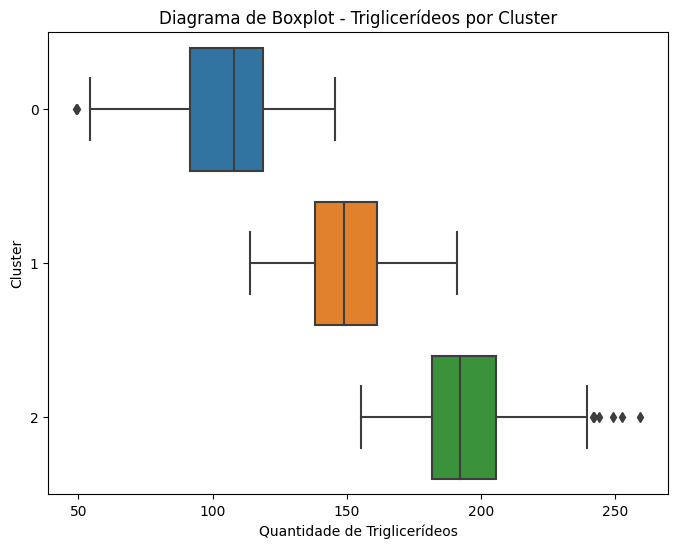

In [ ]:
# Criando gráfico de boxplot entre as variáveis quantidade de triglicerídeos e cluster.
plt.figure(figsize=(8, 6))
sns.boxplot(y='Cluster', x='Triglicerídeos', data=cluster_pacientes, orient='h')

# Personalizar o gráfico
plt.title('Diagrama de Boxplot - Triglicerídeos por Cluster')
plt.xlabel('Quantidade de Triglicerídeos')
plt.ylabel('Cluster')

# Exibir o gráfico
plt.show()

# Análise dos clusters criados

In [ ]:
# Agrupamento dados de cluster por genero
pacientes_mulheres = pacientes_uf.groupby((['nome_cluster','Gênero']), as_index=False).agg(total=('Gênero', 'count'))
pacientes_mulheres

,nome_cluster,Gênero,total
0,Alto Risco,F,118
1,Alto Risco,M,103
2,Baixo Risco,F,124
3,Baixo Risco,M,141
4,Risco Moderado,F,262
5,Risco Moderado,M,242


In [ ]:
# Qual a quantidade de mulheres para o cluster de risco muito alto? 
quantidade_mulheres_alto_risco = pacientes_mulheres.loc[(pacientes_mulheres['nome_cluster'] == 'Alto Risco') & (pacientes_mulheres['Gênero'] == 'F'), 'total'].sum()

print("Quantidade de mulheres para o cluster de Alto Risco:", quantidade_mulheres_alto_risco)


Quantidade de mulheres para o cluster de Alto Risco: 118


In [ ]:
# Filtrar o DataFrame pelo grupo de risco alto
cluster_alto_risco = cluster_pacientes.query('nome_cluster=="Alto Risco"')

# Calcular a contagem de pessoas por estado
contagem_por_estado = cluster_alto_risco['uf'].value_counts()

# Identificar o estado com a maior quantidade de pessoas no cluster "Alto Risco"
estado_maior_quantidade = contagem_por_estado.idxmax()

print("O estado com o maior número de pessoas no grupo de risco alto é:", estado_maior_quantidade)


O estado com o maior número de pessoas no grupo de risco alto é: AL


In [ ]:
contagem_por_estado

Alagoas                13
Amapá                  13
Sergipe                11
Minas Gerais           10
Maranhão               10
Rondônia               10
Distrito Federal       10
Rio de Janeiro          9
Mato Grosso             9
Pará                    9
Goiás                   8
Mato Grosso do Sul      8
Paraíba                 8
Pernambuco              8
São Paulo               8
Rio Grande do Sul       7
Santa Catarina          7
Paraná                  7
Tocantins               7
Ceará                   7
Espírito Santo          6
Bahia                   6
Roraima                 6
Acre                    6
Rio Grande do Norte     6
Piauí                   6
Amazonas                6
Name: nome, dtype: int64

In [ ]:
# Qual região possui o maior valor para a variável triglicerídeos? R: Nordeste

# Agrupar os dados pela coluna de região e encontrar o máximo de triglicerídeos em cada grupo
max_triglicerideos_por_regiao = cluster_pacientes.groupby('regiao')['Triglicerídeos'].max()

# Identificar a região com o maior valor de triglicerídeos
regiao_maior_valor_triglicerideos = max_triglicerideos_por_regiao.idxmax()

print("A região com o maior valor para a variável triglicerídeos é:", regiao_maior_valor_triglicerideos)


A região com o maior valor para a variável triglicerídeos é: Nordeste


In [ ]:
# Agrupando dados de cluster por colesterol
cluster_pacientes.groupby((['nome_cluster','Colesterol Total']), as_index=False).agg(total=('Colesterol Total', 'count'))

,nome_cluster,Colesterol Total,total
0,Alto Risco,151.6,1
1,Alto Risco,158.0,1
2,Alto Risco,160.7,1
3,Alto Risco,164.1,1
4,Alto Risco,167.0,1
...,...,...,...
816,Risco Moderado,254.8,1
817,Risco Moderado,257.6,1
818,Risco Moderado,262.8,1
819,Risco Moderado,263.2,1


In [ ]:
# Após aplicar o algoritmo de agrupamento, gere uma estatística com a função describe da variável colesterol total, 
# agrupando os resultados por cluster.
estatisticas_colesterol = cluster_pacientes.groupby('Cluster')['Colesterol Total'].describe()
estatisticas_colesterol


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,265.0,166.616151,27.905082,96.4,146.400,167.4,186.600,237.1
1,504.0,195.085198,23.868367,113.2,179.275,195.8,211.325,265.6
2,221.0,220.969683,26.752657,151.6,204.100,219.7,240.100,293.2


In [ ]:
# Qual é a média dos pesos das pessoas do sexo masculino que estão presentes no grupo de risco intermediário?

# Filtrar o DataFrame pelo grupo de risco intermediário e pelo sexo masculino
grupo_risco_intermediario = cluster_pacientes[(cluster_pacientes['nome_cluster'] == 'Risco Moderado') & (cluster_pacientes['Gênero'] == 'M')]

# Calcular a média dos pesos
media_pesos = grupo_risco_intermediario['peso'].mean()

print("A média dos pesos das pessoas do sexo masculino no grupo de risco intermediário é:", media_pesos)


A média dos pesos das pessoas do sexo masculino no grupo de risco intermediário é: 152.17231404958676


In [ ]:
cluster_pacientes.groupby(['nome_cluster', 'Gênero'], as_index=False)['peso'].mean()


,nome_cluster,Gênero,peso
0,Alto Risco,F,168.774576
1,Alto Risco,M,171.959223
2,Baixo Risco,F,130.433065
3,Baixo Risco,M,134.677305
4,Risco Moderado,F,151.293511
5,Risco Moderado,M,152.172314


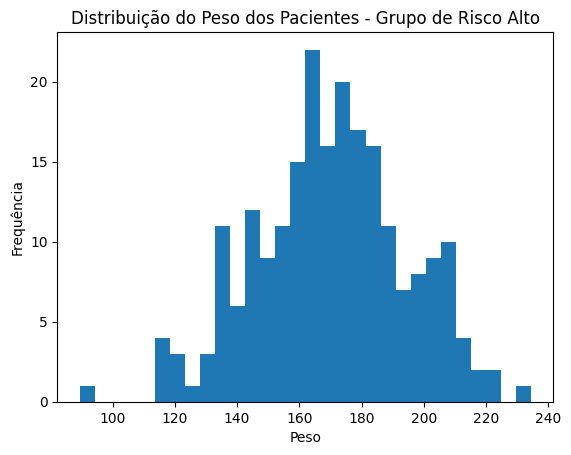

In [ ]:
# Construa um histograma de distribuição do peso dos pacientes do grupo risco alto. Gere um gráfico com 30 barras.

# Filtrar o DataFrame pelo grupo de risco alto
grupo_risco_alto = cluster_pacientes[cluster_pacientes['nome_cluster'] == 'Alto Risco']

# Acessar a coluna de pesos
pesos_risco_alto = grupo_risco_alto['peso']

# Plotar o histograma com 30 barras
plt.hist(pesos_risco_alto, bins=30)

# Definir rótulos e título do gráfico
plt.xlabel('Peso')
plt.ylabel('Frequência')
plt.title('Distribuição do Peso dos Pacientes - Grupo de Risco Alto')

# Exibir o gráfico
plt.show()


In [ ]:
# Qual o estado que possui o maior número de pessoas que possuem nível de açúcar normal?

# Filtrar o DataFrame para obter as linhas com nível de açúcar normal
nivel_acucar_normal = cluster_pacientes[cluster_pacientes['Nível de Açúcar'] == 'Normal']

# Obter a contagem de ocorrências de cada estado
contagem_estados = nivel_acucar_normal['nome'].value_counts()

# Identificar o estado com o maior número de ocorrências
estado_maior_numero_pessoas_normal = contagem_estados.idxmax()

print("O estado que possui o maior número de pessoas com nível de açúcar normal é:", estado_maior_numero_pessoas_normal)


O estado que possui o maior número de pessoas com nível de açúcar normal é: Amazonas


In [ ]:
contagem_estados

Amazonas               36
Minas Gerais           36
Paraíba                35
Paraná                 35
Sergipe                35
Alagoas                33
Roraima                33
Goiás                  33
Maranhão               33
Distrito Federal       32
Rondônia               30
Pernambuco             30
Mato Grosso            30
São Paulo              30
Acre                   29
Pará                   28
Rio Grande do Sul      28
Santa Catarina         27
Piauí                  26
Mato Grosso do Sul     26
Rio de Janeiro         24
Amapá                  23
Tocantins              23
Bahia                  23
Espírito Santo         22
Ceará                  20
Rio Grande do Norte    20
Name: nome, dtype: int64

In [ ]:
# Qual região possui a maior média de pressão sistólica para o grupo de risco alto?

# Filtrar o DataFrame pelo grupo de risco alto
grupo_risco_alto = cluster_pacientes[cluster_pacientes['nome_cluster'] == 'Alto Risco']

# Agrupar os dados pelo campo de região e calcular a média da pressão sistólica
media_pressao_sistolica = grupo_risco_alto.groupby('regiao')['Pressão Sistólica'].mean()

# Identificar a região com a maior média de pressão sistólica
regiao_maior_media_pressao_sistolica = media_pressao_sistolica.idxmax()

print("A região que possui a maior média de pressão sistólica para o grupo de risco alto é:", regiao_maior_media_pressao_sistolica)


A região que possui a maior média de pressão sistólica para o grupo de risco alto é: Norte


In [ ]:
# Qual grupo possui o maior número de pessoas em que o consumo de álcool é baixo?

# Filtrar o DataFrame para obter as linhas com consumo de álcool baixo
consumo_alcool_baixo = cluster_pacientes[cluster_pacientes['Consumo de Álcool'] == 'Baixo']

# Obter a contagem de ocorrências de cada grupo de risco
contagem_grupos = consumo_alcool_baixo['nome_cluster'].value_counts()

# Identificar o grupo com o maior número de ocorrências
grupo_maior_numero_pessoas_consumo_baixo = contagem_grupos.idxmax()

print("O grupo que possui o maior número de pessoas com consumo de álcool baixo é:", grupo_maior_numero_pessoas_consumo_baixo)


O grupo que possui o maior número de pessoas com consumo de álcool baixo é: Risco Moderado
